In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [9]:
df_meal = pd.read_csv('meal_info.csv')
df_meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [10]:
df_center = pd.read_csv('fulfilment_center_info.csv')
df_center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [11]:
df_food = pd.read_csv('train.csv')
df_food.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [13]:
df = pd.merge(df_food, df_center, on = 'center_id')
df = pd.merge(df,df_meal, on = 'meal_id')
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [14]:
table = pd.pivot_table(data = df, index = 'category',values = 'num_orders', aggfunc = np.sum)

In [15]:
table

,num_orders
category,
Beverages,40480525
Biryani,631848
Desert,1940754
Extras,3984979
Fish,871959
Other Snacks,4766293
Pasta,1637744
Pizza,7383720
Rice Bowl,20874063


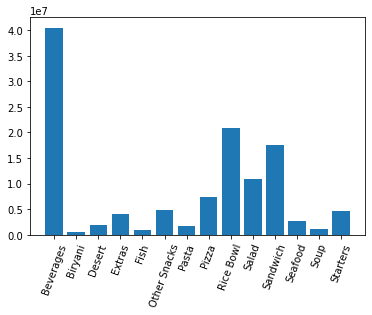

In [17]:
plt.bar(table.index, table['num_orders'])
plt.xticks(rotation = 70)
plt.show()

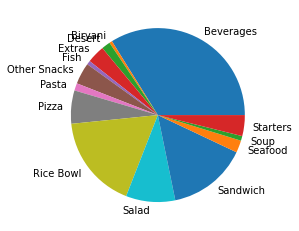

In [23]:
plt.pie(table['num_orders'], labels = table.index)
plt.show()

In [27]:
table_1 = pd.pivot_table(data = df, index = 'cuisine',values = 'num_orders', aggfunc = np.sum)

In [28]:
table_1

,num_orders
cuisine,
Continental,16914439
Indian,25792544
Italian,44172832
Thai,32677670


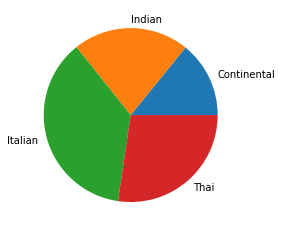

In [30]:
plt.pie(table_1['num_orders'], labels = table_1.index)
plt.show()

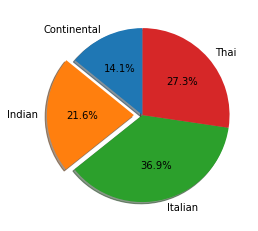

In [31]:
plt.pie(table_1['num_orders'], labels = table_1.index, startangle = 90,shadow = True, explode = (0,0.1,0,0), autopct = '%1.1f%%')
plt.show()